In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_nn=pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-2/final/trading_signals/tcs_nn_ts.csv')
df_tech=pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-2/final/trading_signals/tcs_ti_ts.csv')

In [3]:
n=len(df_tech)
w=25
b=int(0.8*(n-w))
y=b+w

df_tech_u=df_tech.iloc[y:,:]
df_tech_close=df_tech['Close']
df_tech_u.shape

(636, 3)

In [4]:
nn_num=df_nn.to_numpy()
nn_num=nn_num[:,-1]
nn_num=nn_num.reshape(-1,1)
nn_num.shape

(636, 1)

In [5]:
tech_num=df_tech_u.to_numpy()
tech_num=tech_num[:,-1]
tech_num=tech_num.reshape(-1,1)
tech_num.shape

(636, 1)

In [6]:
#final trade signals
final=np.array([])

for i in range(len(tech_num)):
    if tech_num[i]==1 and nn_num[i]==1:
        final=np.append(final,1)
    elif tech_num[i]==-1 and nn_num[i]==-1:
        final=np.append(final,-1)
    else:
        final=np.append(final,0)

In [7]:
final=final.reshape(-1,1)
final.shape

(636, 1)

In [8]:
#profit calculation

profit=0
loss=0
for i in range(len(final)):
    if final[i]==1:
        profit+=df_tech_close[y+i]-df_tech_close[y+i-1]
    elif final[i]==-1:
        loss+=df_tech_close[y+i-1]-df_tech_close[y+i]

net_profit=profit-loss
profit_factor=profit/loss
print('Net Profit:',net_profit)
print('Profit Factor:',profit_factor)


Net Profit: 274.568115234375
Profit Factor: 5.146349646430757


In [9]:
#no of trades
trades=0
for i in range(len(final)):
    if final[i]!=0:
        trades+=1

print('no of trades:',trades)

no of trades: 9


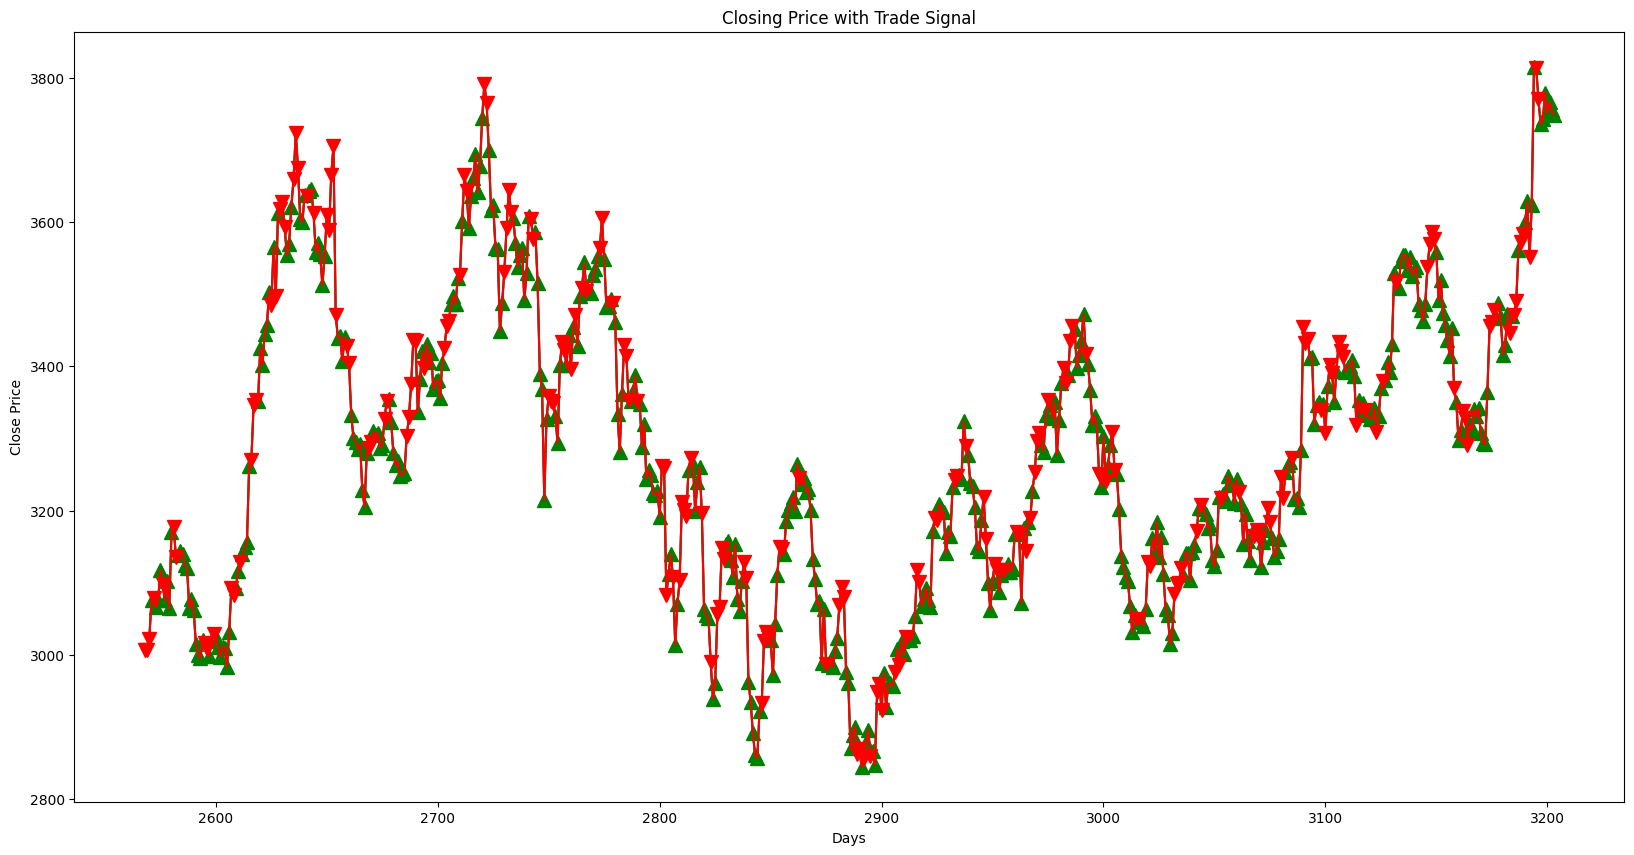

In [10]:
#plot with nn trade signals
plt.figure(figsize=(20,10))
plt.plot(df_tech_u['Close'])
plt.title('Closing Price with Trade Signal')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df_tech_u.index,df_tech_u['Close'],'-^', markevery=[i for i in range(len(nn_num)) if nn_num[i]==1], ms=10, color='g')
plt.plot(df_tech_u.index,df_tech_u['Close'],'-v', markevery=[i for i in range(len(nn_num)) if nn_num[i]==-1], ms=10, color='r')
plt.show()

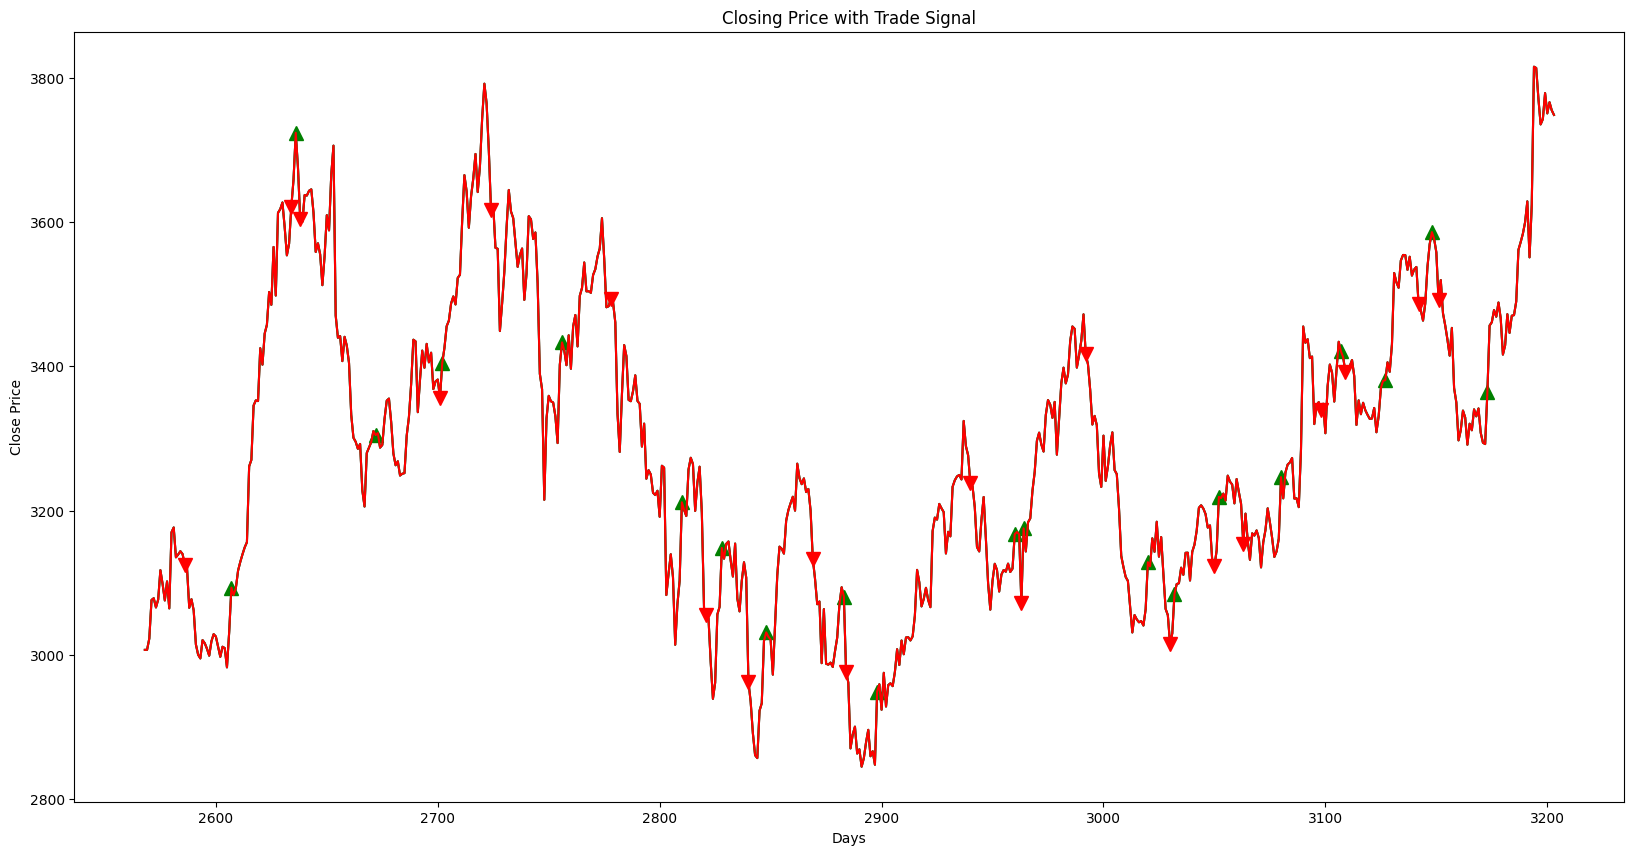

In [11]:
#plot with macd trade signals
plt.figure(figsize=(20,10))
plt.plot(df_tech_u['Close'])
plt.title('Closing Price with Trade Signal')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df_tech_u.index,df_tech_u['Close'],'-^', markevery=[i for i in range(len(tech_num)) if tech_num[i]==1], ms=10, color='g')
plt.plot(df_tech_u.index,df_tech_u['Close'],'-v', markevery=[i for i in range(len(tech_num)) if tech_num[i]==-1], ms=10, color='r')
plt.show()

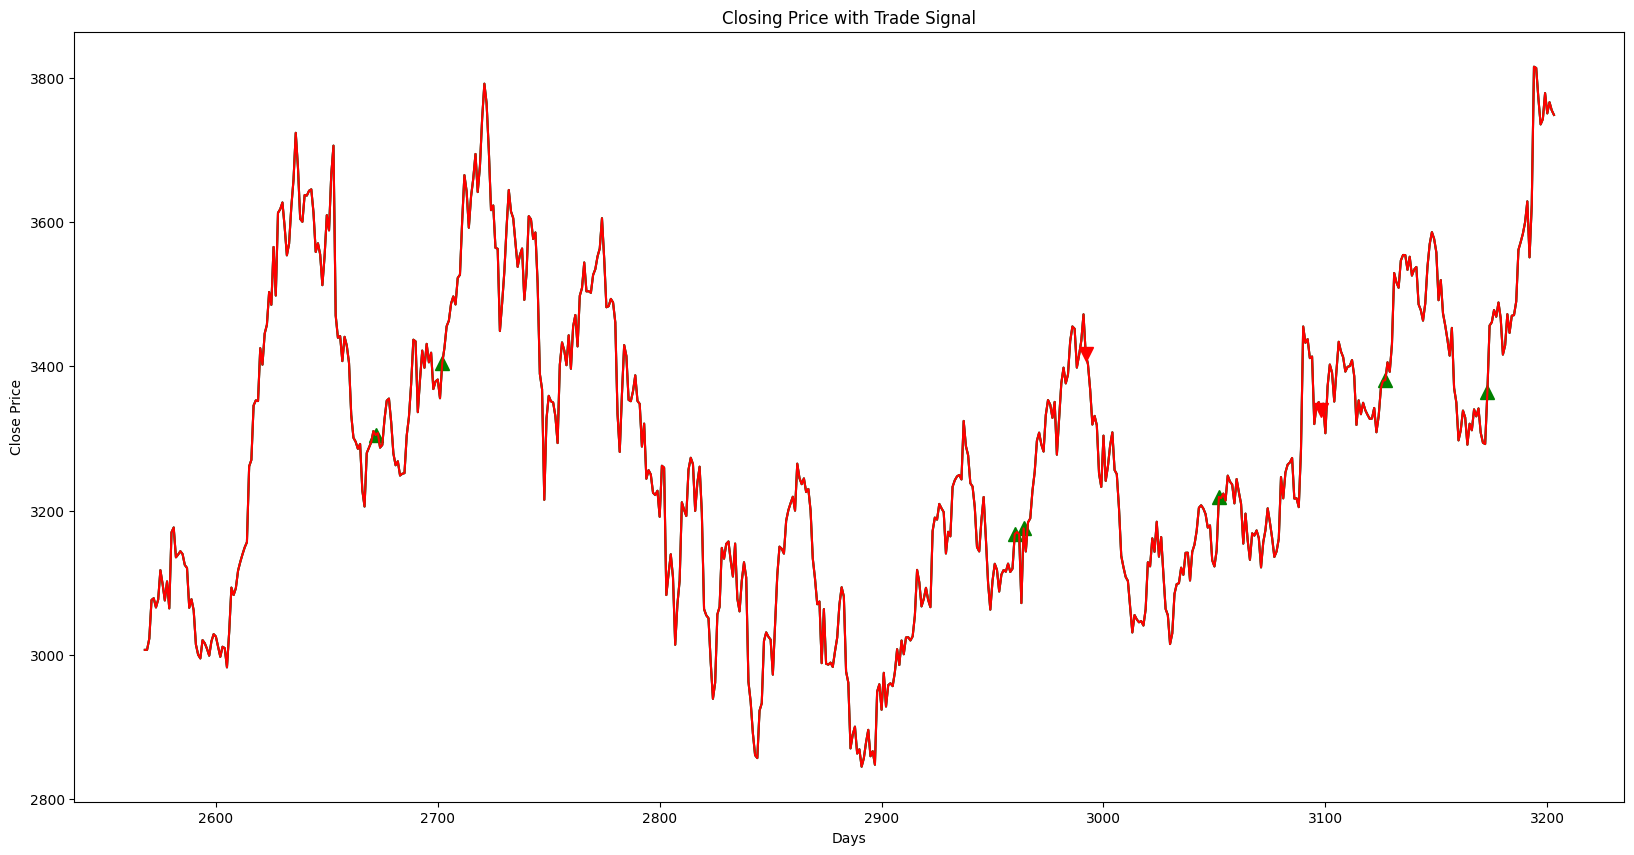

In [12]:
#plot with final hybrid trade signals

plt.figure(figsize=(20,10))
plt.plot(df_tech_u['Close'])
plt.title('Closing Price with Trade Signal')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df_tech_u.index,df_tech_u['Close'],'-^', markevery=[i for i in range(len(final)) if final[i]==1], ms=10, color='g')
plt.plot(df_tech_u.index,df_tech_u['Close'],'-v', markevery=[i for i in range(len(final)) if final[i]==-1], ms=10, color='r')
plt.show()

